# explore


In [9]:
#| default_exp explore

In [70]:
#| export
import numpy as np
from graphviz import Digraph
import math

In [71]:
#| export 
class Value:
    
    def __init__(self, data: float, _prev:set=(), _op: str='', label='') -> None:
        self.data = data
        self._prev = _prev
        self._op = _op
        self.label = label
        self.grad = 0.
        
    def __repr__(self) -> str:
        return f"Value({self.data = }, {self.grad=}, {self.label = })"
    
    def __add__(self, other):
        return Value(self.data + other.data, _prev=(self,other),_op='+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, _prev=(self,other),_op='*')
    
    def tanh(self):
        x = self.data
        n = (1-math.exp(-2*x))/(1+math.exp(-2*x))
        return Value(n, _prev=(self,), _op='tanh')

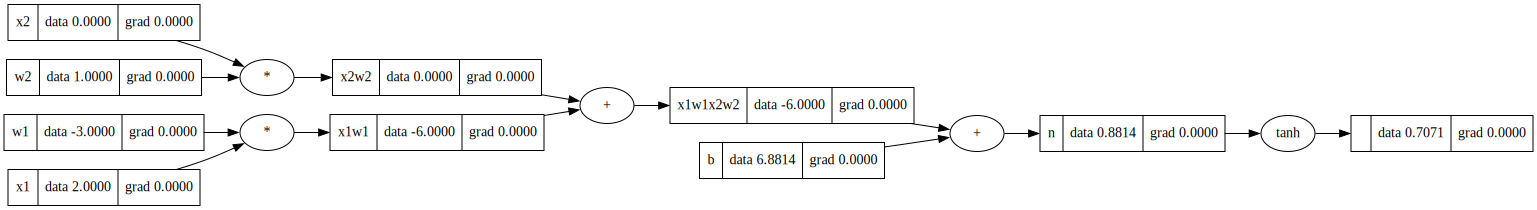

In [75]:
x1 = Value(2., label='x1')
x2 = Value(0., label='x2')

w1 = Value(-3., label='w1')
w2 = Value(1, label='w2')

x1w1 = x1 * w1; x1w1.label='x1w1'
x2w2 = x2 * w2; x2w2.label='x2w2'
b = Value(6.8813735870195432, label='b')
x1w1x2w2= x1w1 + x2w2; x1w1x2w2.label='x1w1x2w2'
n = x1w1x2w2+b; n.label='n'
o = n.tanh()

draw_dot(o)


In [59]:

a = Value(2., label='a')
b = Value(-3., label='b')
c = Value(10., label='c')
e = a*b; e.label='e'
d= c+e; d.label='d'
f = Value(-2, label='f')
L = f*d; L.label='L'
L
L.grad = 1
d.grad = -2
f.grad = 16
e.grad = -2
c.grad = -2
a.grad = 6.
b.grad = -4


In [64]:
e = 0.01
a.data += e * a.grad
b.data += e * b.grad
c.data += e * c.grad
f.data += e * f.grad

e = a*b
d = c + e
L = d * f
L

Value(self.data = -6.840384, self.grad=0.0, self.label = '')

In [60]:
def grad():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  
  c = Value(10.0, label='c')

  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  #d.data += h
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L.data += h
  L2 = L.data
  
  print((L2 - L1)/h)
  
grad()


1.000000000000334


In [61]:
d._op
d._prev[1]._op

'*'

In [62]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{%s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

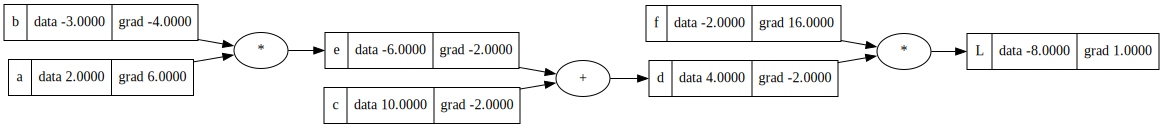

In [63]:
draw_dot(L)

array([1, 2, 4])